In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error

In [17]:
def get_value(row, column, T):
    """
    A function to get the T of each cell by using the discrete Laplace equation. For the walls, I ignore the outside
    cells to model the fact that they are isolated.
    """
    if row ==0 and column ==0:
        value =(1/2) * (T[row+1, column]+T[row, column+1])
        
    elif row==d-1 and column == d-1:
        value =(1/2) * (T[row-1, column]+T[row, column-1])
    
    elif row==0 and column == d-1:
        value = (1/2) * (T[row+1, column]+T[row, column-1])
        
    elif row == d-1 and column ==0:
        value = (1/2) * (T[row-1, column]+T[row, column+1])
    
    elif row == 0:
        value =(1/3) * (T[row+1, column]+T[row, column+1]+T[row, column-1])
    
    elif row == d-1:
        value =(1/3) * (T[row-1, column]+T[row, column+1]+T[row, column-1])
    
    elif column ==0:
        value =(1/3) * (T[row+1, column]+T[row-1, column]+T[row, column+1])
    
    elif column == d-1:
        value =(1/3) * (T[row+1, column]+T[row-1, column]+T[row, column-1])
    else:
        value = (1/4) * (T[row+1, column]+T[row-1, column]+T[row, column+1]+T[row, column-1])
        
    return value

In [44]:
def diffuse(coeff):
    avg_temps = []
    d = 30 # using a grid of dxd
    T = np.zeros((d, d)) 
    #placing the griller in the middle of the room:
    middle_point = int(d/2)
    T[middle_point-2:middle_point+2, middle_point-2:middle_point+2] =100


    iteration = 0 # counting how many iterations until convergence

    while True: #running the simulation until convergence happens
                # I assume that convergence happens when the change in the average room
                # temperature is less than 0.01


        iteration+=1
        current_average = np.mean(T) # keeping track of the average room temperature
        avg_temps.append(current_average)
        for row in range(d):
            for column in range(d):
                T[row, column]  =  coeff*get_value(row, column, T)
                T[middle_point-2:middle_point+2, middle_point-2:middle_point+2] =100 #keeping the griller at 100

        if abs(current_average - np.mean(T)) < 0.01: # if no more significant change in the room temperature
            print(f"Converged after {iteration} iterations")
            break #stop
        else:
            current_average = np.mean(T)
    
    return d, T, avg_temps, iteration

In [ ]:
# trying with a coeff of 0.999

Converged after 716 iterations


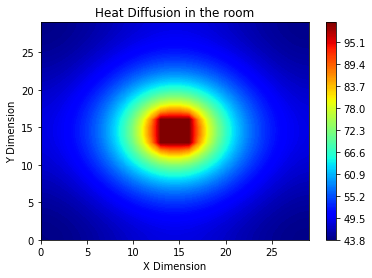

In [41]:
d, T, avg_temps_1 = diffuse(0.999)
x, y = np.meshgrid(np.arange(0, d), np.arange(0, d))
colorinterpolation = 50
colourMap = plt.cm.jet
plt.contourf(x, y, T, 200,cmap=colourMap)
plt.colorbar()
plt.xlabel("X Dimension")
plt.ylabel("Y Dimension")
plt.title("Heat Diffusion in the room")
plt.show()

In [ ]:
# trying with a coeff of 1

Converged after 1331 iterations


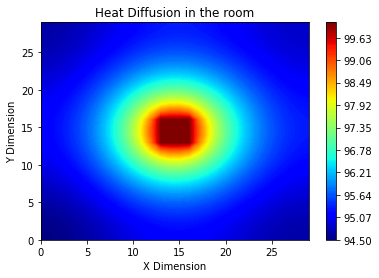

In [42]:
d, T, avg_temps_2 = diffuse(1)
x, y = np.meshgrid(np.arange(0, d), np.arange(0, d))
colorinterpolation = 50
colourMap = plt.cm.jet
plt.contourf(x, y, T, 200,cmap=colourMap)
plt.colorbar()
plt.xlabel("X Dimension")
plt.ylabel("Y Dimension")
plt.title("Heat Diffusion in the room")
plt.show()

Text(0, 0.5, 'Temp')

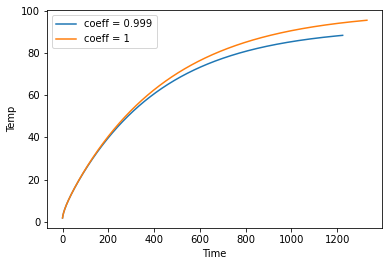

In [43]:
plt.plot([i for i in range(len(avg_temps))], avg_temps, label = "coeff = 0.999")
plt.plot([i for i in range(len(avg_temps_2))], avg_temps_2, label = "coeff = 1")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Temp")

We see that as the coeff increases, the rate of heat diffusion is higher

In [ ]:

d, T, avg_temps_2 = diffuse(1)
